# PyTorch中三个最常见的错误

以下是最常见的错误：

1. **形状错误** - 您试图对形状不匹配的矩阵/张量执行操作。例如，您的数据形状是 `[1, 28, 28]`，但您的第一层要求输入为 `[10]`。
2. **设备错误** - 您的模型位于与您的数据不同的设备上。例如，您的模型位于GPU上（例如 `"cuda"`），而您的数据位于CPU上（例如 `"cpu"`）。
3. **数据类型错误** - 您的数据是一种数据类型（例如 `torch.float32`），但您尝试执行的操作需要另一种数据类型（例如 `torch.int64`）。

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/misc-three-main-errors-in-pytorch.png" width=750 alt="PyTorch中三个最常见的错误"/>

注意这里的重复主题。

您的形状、设备和/或数据类型之间存在某种不匹配。

本笔记本/博文将介绍上述每种错误的示例以及如何解决它们。

这不会阻止您将来犯这些错误，但它会使您足够了解，以减少它们，甚至更重要的是，知道如何解决它们。

> **注意：** 以下所有示例都已经改编自 [learnpytorch.io](https://learnpytorch.io)，这是 [从零开始掌握：PyTorch深度学习](https://dbourke.link/ZTMPyTorch) 视频课程的书籍版本。

## 1. PyTorch中张量维度

### 1.1 矩阵乘法形状错误

PyTorch 是构建神经网络模型的最佳框架之一。

而神经网络的一个基本操作就是矩阵乘法。

然而，矩阵乘法具有非常特定的规则。

如果不遵循这些规则，就会出现臭名昭著的形状错误。

```
RuntimeError: mat1 和 mat2 的形状不能相乘（3x4 和 3x4）
```

让我们从一个简短的示例开始。

> **注意：** 虽然它被称为 "矩阵乘法"，但在 PyTorch 中几乎所有形式的数据都以张量的形式出现。张量是一个 n 维数组（n 可以是任意数字）。因此，虽然我使用了术语 "矩阵乘法"，但这也适用于 "张量乘法"。有关矩阵和张量之间区别的更多信息，请参阅[PyTorch 基础知识：张量简介](https://www.learnpytorch.io/00_pytorch_fundamentals/#introduction-to-tensors)。

In [ ]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.12.1+cu113


In [ ]:
# Create two tensors
tensor_1 = torch.rand(3, 4)
tensor_2 = torch.rand(3, 4)

# Check the shapes
print(tensor_1.shape)
print(tensor_2.shape)

torch.Size([3, 4])
torch.Size([3, 4])


请注意，两个张量具有相同的形状。

让我们尝试对它们执行矩阵乘法。

> **注意：** 矩阵乘法操作与标准乘法操作不同。
>
> 对于我们当前的张量，标准乘法操作（`*` 或 [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html)）将起作用，而矩阵乘法操作（`@` 或 [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html)）将出错。
>
> 请参阅[PyTorch基础知识：矩阵乘法](https://www.learnpytorch.io/00_pytorch_fundamentals/#matrix-multiplication-is-all-you-need)了解矩阵乘法的工作原理。

In [ ]:
# Standard multiplication, the following lines perform the same operation (will work)
tensor_3 = tensor_1 * tensor_2 # can do standard multiplication with "*"
tensor_4 = torch.mul(tensor_1, tensor_2) # can also do standard multiplicaton with "torch.mul()"

# Check for equality
tensor_3 == tensor_4

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

太好了！看起来标准乘法在我们当前的张量形状下可以工作。

让我们尝试进行矩阵乘法。

In [ ]:
# Try matrix multiplication (won't work)
tensor_5 = tensor_1 @ tensor_2 # could also do "torch.matmul(tensor_1, tensor_2)"

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 3x4)

糟糕！

我们遇到了类似以下的错误：

```
RuntimeError                              Traceback (most recent call last)
<ipython-input-11-2ca2c90dbb42> in <module>
      1 # Try matrix multiplication (won't work)
----> 2 tensor_5 = tensor_1 @ tensor_2

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 3x4)
```

这是一个**形状错误**，我们的两个张量（矩阵）不能进行*矩阵*乘法，因为它们的形状不兼容。

为什么会这样？

这是因为矩阵乘法有特定的规则：

1. **内部维度**必须匹配：
* `(3, 4) @ (3, 4)` 不起作用
* `(4, 3) @ (3, 4)` 起作用
* `(3, 4) @ (4, 3)` 起作用
2. 结果矩阵的形状是**外部维度**：
* `(4, 3) @ (3, 4)` -> `(4, 4)`
* `(3, 4) @ (4, 3)` -> `(3, 3)`

那么我们该如何解决呢？

这就涉及到*转置*或*重塑*操作。

在神经网络的情况下，更常见的是转置操作。

* **转置** - 转置（[`torch.transpose()`](https://pytorch.org/docs/stable/generated/torch.transpose.html)）操作交换给定张量的维度。
  * **注意：** 您还可以使用 `tensor.T` 的快捷方式来执行转置。
* **重塑** - 重塑（[`torch.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html)）操作返回一个具有相同原始元素数量但形状不同的张量。

让我们看看这些操作的效果。

In [ ]:
# Perform a transpose on tensor_1 and then perform matrix multiplication
tensor_6 = tensor_1.T @ tensor_2
print(f"Shape of input tensors: {tensor_1.T.shape} and {tensor_2.shape}")
print(f"Shape of output tensor: {tensor_6.shape}")

Shape of input tensors: torch.Size([4, 3]) and torch.Size([3, 4])
Shape of output tensor: torch.Size([4, 4])


没有错误！

请注意，由于转置（`tensor_1.T`），`tensor_1` 的输入形状已从 `(3, 4)` 变为 `(4, 3)`。

由于这个变化，满足了矩阵乘法的第一条规则，**内部维度必须匹配**。

最后，输出形状满足了矩阵乘法的第二条规则，**结果矩阵的形状是外部维度**。

在我们的案例中，`tensor_6` 的形状为 `(4, 4)`。

让我们执行相同的操作，但这次我们将转置 `tensor_2` 而不是 `tensor_1`。

In [ ]:
# Perform a transpose on tensor_2 and then perform matrix multiplication
tensor_7 = tensor_1 @ tensor_2.T
print(f"Shape of input tensors: {tensor_1.shape} and {tensor_2.T.shape}")
print(f"Shape of output tensor: {tensor_7.shape}")

Shape of input tensors: torch.Size([3, 4]) and torch.Size([4, 3])
Shape of output tensor: torch.Size([3, 3])


太棒了！

再次没有错误！

请注意，矩阵乘法的规则 1 和规则 2 再次得到满足。

不同的是，这次由于我们对 `tensor_2` 进行了转置，所以结果输出张量的形状是 `(3, 3)`。

好消息是，大多数情况下，当您使用 PyTorch 构建神经网络时，库会为您处理大部分需要执行的矩阵乘法操作。

话虽如此，让我们使用 PyTorch 构建一个神经网络，并看看形状错误可能出现的地方。

### 1.2 PyTorch神经网络形状错误

我们已经看到了在使用矩阵乘法（或矩阵乘法张量）时形状错误可能发生的情况。

现在让我们使用PyTorch构建一个神经网络，并看看形状错误可能发生的地方。

在神经网络中，形状错误会在以下任何情况下发生：
* **输入形状不正确** - 您的数据处于某种形状，但模型的第一层期望的形状不同。
* **层之间的输入和输出形状不正确** - 您的模型的某一层输出某种形状，但下一层期望的输入形状不同。
* **在尝试进行预测时输入数据中没有批量大小维度** - 您的模型是在具有批量维度的样本上训练的，因此当您尝试在*没有*批量维度的单个样本上进行预测时，就会出现错误。

为了展示这些形状错误，让我们构建一个简单的神经网络（无论您的网络大小如何，错误都是相同的），尝试在时尚MNIST数据集（10种不同类别的黑白服装图像）中找到模式。

> **注意：** 以下示例专注于形状错误，而不是构建*最佳*神经网络。您可以在 [PyTorch计算机视觉](https://www.learnpytorch.io/03_pytorch_computer_vision/) 中看到这个问题的完整工作示例。



### 1.3 下载数据集

首先，我们将从 [`torchvision.datasets`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) 获取时尚 MNIST 数据集。

In [ ]:
import torchvision
from torchvision import datasets, transforms

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



现在让我们获取有关第一个训练样本的一些细节，包括标签以及类别名称和类别数量。

In [ ]:
# See first training sample
image, label = train_data[0]
print(f"Image shape: {image.shape} -> [batch, height, width]")
print(f"Label: {label}") # label is an int rather than a tensor (it has no shape attribute)

Image shape: torch.Size([1, 28, 28]) -> [batch, height, width]
Label: 9


我们的图像形状为 `[1, 28, 28]`，或者 `[批量大小, 高度, 宽度]`。

In [ ]:
# See class names and number of classes
class_names = train_data.classes
num_classes = len(class_names)
class_names, num_classes

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

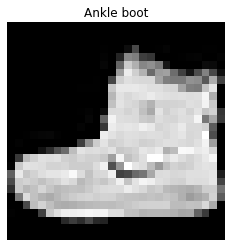

In [ ]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray") # plot image as grayscale
plt.axis(False)
plt.title(class_names[label]);

### 1.4 构建一系列具有不同形状错误的神经网络

我们的问题是：构建一个神经网络，能够在服装的灰度图像中找到模式。

这个陈述可以非常深入，因为“哪个神经网络是最好的？”是整个机器学习领域的主要研究问题之一。

但是，为了展示不同类型的错误，让我们尽可能简单地开始。

我们将使用PyTorch构建几个具有不同错误的两层神经网络，每个网络用于展示不同类型的错误：

| **模型编号** | **层次结构** | **错误展示** |
| ----- | ----- | ----- |
| 0 | 2 x `nn.Linear()`，每层有10个隐藏单元 | 输入形状不正确 |
| 1 | 与模型1相同 + 1 x `nn.Flatten()` | 输入形状不正确（仍然） |
| 2 | 1 x `nn.Flatten()`，1 x `nn.Linear()`（输入形状正确），1 x `nn.Linear()`，每层有10个隐藏单元 | 无（输入形状正确） |
| 3 | 与模型2相同，但在`nn.Linear()`层之间具有不同的形状 | 层之间的形状不正确 |
| 4 | 与模型3相同，但最后一层替换为 `nn.LazyLinear()` | 无（展示 `nn.LazyX()` 层如何推断正确的形状） |
| 5 | 与模型4相同，但所有 `nn.Linear()` 替换为 `nn.LazyLinear()` | 无（展示 `nn.LazyX()` 层如何推断正确的形状）  |

### 1.5 错误的网络层输入

我们将从一个具有两个层的网络开始，每个层都有10个隐藏单元的 [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)。

> **注意：** 查看 [01. PyTorch 工作流程第 6 节：将所有内容整合起来](https://www.learnpytorch.io/01_pytorch_workflow/#6-putting-it-all-together) 了解 `nn.Linear()` 内部发生的情况。

然后，我们将把我们的 `image` 通过网络传递，并看看会发生什么。

In [ ]:
from torch import nn

# Create a two layer neural network
model_0 = nn.Sequential(
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model (this will error)
model_0(image)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)

运行上述代码，我们会得到另一个形状错误！

类似于以下内容：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)
```

关键在于最后一行 `RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)`。

这告诉我们数据形状存在问题。

因为在幕后，`nn.Linear()` 正试图进行矩阵乘法。

我们如何解决这个问题呢？

根据您使用的是哪种类型的层，有几种不同的选择。

但由于我们使用的是 `nn.Linear()` 层，让我们专注于这个。

`nn.Linear()` 喜欢将数据作为单维向量输入。

例如，输入 `image` 的形状不是 `[1, 28, 28]`，而是 `[1, 784]` (`784 = 28*28`) 更合适。

换句话说，它希望所有信息都被 *展平* 成一个单维。

我们可以使用 PyTorch 的 [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) 来实现这种展平。

让我们看看它是如何发生的。

In [ ]:
# Create a flatten layer
flatten = nn.Flatten()

# Pass the image through the flatten layer
flattened_image = flatten(image)

# Print out the image shape before and after
print(f"Before flatten shape: {image.shape} -> [batch, height, width]")
print(f"After flatten shape: {flattened_image.shape} -> [batch, height*width]")

Before flatten shape: torch.Size([1, 28, 28]) -> [batch, height, width]
After flatten shape: torch.Size([1, 784]) -> [batch, height*width]


太棒了，图像数据已经展平了！

现在让我们尝试将 `nn.Flatten()` 层添加到我们现有的模型中。

In [ ]:
# Replicate model_0 except add a nn.Flatten() layer to begin with
model_1 = nn.Sequential(
    nn.Flatten(), # <-- NEW: add nn.Flatten() layer
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model
model_1(image)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)

又出现了另一个错误，类似于：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)
```

同样，关键信息在底部的行。

`RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)`

嗯，我们知道 `(1x784)` 必须来自我们的输入数据（`image`），因为我们将其从 `(1, 28, 28)` 展平为 `(1, 784)`。

那么 `(10x10)` 呢？

这些值来自我们在 `nn.Linear()` 层中设置的参数，即 `in_features=10` 和 `out_features=10` 或 `nn.Linear(in_features=10, out_features=10)`。

再次回顾一下矩阵乘法的第一条规则是什么？

1. **内部维度**必须匹配。

没错！

那么如果我们将第一层的 `in_features=10` 改为 `in_features=784` 会发生什么呢？

让我们来找找看！

In [ ]:
# Flatten the input as well as make sure the first layer can accept the flattened input shape
model_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10), # <-- NEW: change in_features=10 to in_features=784
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model
model_2(image)

tensor([[-0.2045,  0.2677, -0.0713, -0.3096, -0.0586,  0.3153, -0.3413,  0.2031,
          0.4421,  0.1715]], grad_fn=<AddmmBackward0>)

成功了！

我们从模型得到了一个输出！

现在输出可能意义不大，但至少我们知道所有的形状都匹配，并且数据可以在我们的模型中流动。

`nn.Flatten()` 层将我们的输入图像从 `(1, 28, 28)` 转换为 `(1, 784)`，而我们的第一个 `nn.Linear(in_features=784, out_features=10)` 层可以接受它作为输入。

### 1.6 不正确的隐藏层输入和输出层维度

如果我们的输入层具有正确的形状，但相互连接的层之间存在不匹配，会发生什么呢？

换句话说，我们的第一个 `nn.Linear()` 层具有 `out_features=10`，但接下来的 `nn.Linear()` 层具有 `in_features=5`。

这是一个**层之间的输入和输出形状不正确**的例子。

In [ ]:
# Create a model with incorrect input and output shapes between layers
model_3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10), # out_features=10
    nn.Linear(in_features=5, out_features=10) # <-- NEW: in_features does not match the out_features of the previous layer
)

# Pass the image through the model (this will error)
model_3(image)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 5x10)

再次运行上面的模型，我们得到以下错误：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 5x10)
```

再次，我们违反了矩阵乘法的第一条规则，**内部维度**必须匹配。

我们的第一个 `nn.Linear()` 层输出形状为 `(1, 10)`，但我们的第二个 `nn.Linear()` 层期望的形状为 `(1, 5)`。

我们该如何解决这个问题呢？

嗯，我们可以手动为第二个 `nn.Linear()` 设置 `in_features=10`，或者我们可以尝试使用 PyTorch 的一项新功能，即“延迟”层。

### 1.7 PyTorch的延迟层（自动推断输入形状）

在PyTorch中，延迟层通常以 `nn.LazyX` 的形式出现，其中 `X` 是该层的现有非延迟形式。

例如，`nn.Linear()` 的延迟等价物是 [`nn.LazyLinear()`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html)。

延迟层的主要特征是*推断*前一层的 `in_features` 或输入形状应该是什么。

> **注意：** 截至2022年11月，PyTorch中的延迟层仍处于实验阶段，可能会发生变化，但它们的使用方式不应与以下内容有太大差异。

例如，如果前一层具有 `out_features=10`，则随后的延迟层应该推断 `in_features=10`。

让我们来测试一下。

In [ ]:
# Try nn.LazyLinear() as the second layer
model_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10),
    nn.LazyLinear(out_features=10) # <-- NEW: no in_features parameter as this is inferred from the previous layer's output
)

# Pass the image through the model
model_4(image)

/home/daniel/code/pytorch/env/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[ 0.4282,  0.2492, -0.2045, -0.4943, -0.1639,  0.1166,  0.3828, -0.1283,
         -0.1771, -0.2277]], grad_fn=<AddmmBackward0>)

它可以工作（尽管根据您使用的PyTorch版本可能会有警告，如果有的话，不要担心，这只是说 `Lazy` 层仍在开发中）！

我们试试用 `nn.LazyLinear()` 层替换所有的 `nn.Linear()` 层吧？

然后我们只需要为每个层设置 `out_features` 值。

In [ ]:
# Replace all nn.Linear() layers with nn.LazyLinear()
model_5 = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(out_features=10),
    nn.LazyLinear(out_features=10) # <-- NEW
)

# Pass the image through the model
model_5(image)

tensor([[ 0.1375, -0.2175, -0.1054,  0.1424, -0.1406, -0.1180, -0.0896, -0.4285,
         -0.0077, -0.3188]], grad_fn=<AddmmBackward0>)

太棒了！又成功了，我们的图像能够顺利通过网络流动，没有任何问题。

> **注意：** 上面的例子只涉及PyTorch中一种类型的层，即 `nn.Linear()`，然而，将输入和输出形状与每个层对齐的原则在所有神经网络和不同类型的数据中都是一致的。
>
> 像 [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) 这样的层，用于卷积神经网络（CNNs），甚至可以在不使用 `nn.Flatten()` 的情况下接受输入。

## 2. PyTorch中的设备错误

PyTorch的一个主要优势是其内置的在GPU（图形处理单元）上进行计算的能力。

GPU通常能够比CPU（中央处理单元）更快地执行操作，特别是矩阵乘法（构成神经网络大部分操作）。

如果您使用的是原始的PyTorch（没有其他外部库），PyTorch要求您明确设置您正在计算的设备。

例如，要将您的模型发送到目标 `device`，您会使用 [`to()`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) 方法，如 `model.to(device)`。

数据也是类似的，使用 `some_dataset.to(device)`。

**设备错误**发生在您的模型/数据位于不同设备上时。

例如，当您将模型发送到目标GPU设备，但您的数据仍然在CPU上时。

### 2.1 设置目标设备

如果可用，让我们将当前设备设置为 `"cuda"`。

> **注意：** 更多关于如何访问GPU并在PyTorch中设置它的信息，请参阅 [00. PyTorch 基础知识：在GPU上运行张量](https://www.learnpytorch.io/00_pytorch_fundamentals/#running-tensors-on-gpus-and-making-faster-computations)。

In [ ]:
import torch

# Set device to "cuda" if it's available otherwise default to "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device: {device}")

Current device: cuda


现在让我们创建一个与 `model_5` 相同层的模型。

在PyTorch中，默认情况下，模型和张量是在CPU上创建的。

我们可以通过检查我们创建的模型的 `device` 属性来测试这一点。

In [ ]:
from torch import nn

# Create a model (similar to model_5 above)
model_6 = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(out_features=10),
    nn.LazyLinear(out_features=10)
)

# All models and tensors are created on the CPU by default (unless explicitly set otherwise)
print(f"Model is on device: {next(model_6.parameters()).device}")

Model is on device: cpu


### 2.2 为模型准备数据

为了为建模做好数据准备，让我们创建一些PyTorch的`DataLoader`。

为了加快速度，我们将使用[`torch.utils.data.RandomSampler`](https://pytorch.org/docs/stable/data.html#torch.utils.data.RandomSampler)的一个实例来随机选择训练和测试样本的10%（我们更关心展示潜在的错误，而不是最佳性能模型）。

我们还将设置损失函数为`torch.nn.CrossEntropyLoss()`，以及优化器为`torch.optim.SGD(lr=0.01)`。

In [ ]:
from torch.utils.data import DataLoader, RandomSampler

# Only sample 10% of the data
train_sampler = RandomSampler(train_data,
                              num_samples=int(0.1*len(train_data)))

test_sampler = RandomSampler(test_data,
                             num_samples=int(0.1*len(test_data)))

print(f"Number of random training samples selected: {len(train_sampler)}/{len(train_data)}")
print(f"Number of random testing samples selected: {len(test_sampler)}/{len(test_data)}")

# Create DataLoaders and turn data into batches
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              sampler=train_sampler)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             sampler=test_sampler)

print(f"Number of batches in train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Number of batches in test_dataloader: {len(test_dataloader)} batch of size {BATCH_SIZE}")

# Create loss function
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(lr=0.01,
                            params=model_6.parameters())

Number of random training samples selected: 6000/60000
Number of random testing samples selected: 1000/10000
Number of batches in train_dataloader: 188 batches of size 32
Number of batches in test_dataloader: 32 batch of size 32


### 2.3 在CPU上训练模型

数据准备好了，模型也准备好了，让我们开始训练吧！

我们将使用标准的PyTorch训练循环，在10%的数据上对 `model_6` 进行五个周期的训练。

在这里不要太担心损失是否尽可能低，因为我们更关注的是确保没有任何错误，而不是损失尽可能低。

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/01-pytorch-training-loop-annotated.png" alt="annotated pytorch training loop steps" width=750/>

In [ ]:
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

    # Set loss to 0 every epoch
    train_loss = 0

    # Get images (X) and labels (y)
    for X, y in train_dataloader:

        # Forward pass
        y_pred = model_6(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

    # Print loss in the epoch loop only
    print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Training loss: 334.65
Epoch: 1 | Training loss: 215.44
Epoch: 2 | Training loss: 171.15
Epoch: 3 | Training loss: 154.72
Epoch: 4 | Training loss: 142.22


太好了！看起来我们的训练循环正在运行！

我们模型的损失在下降（损失越低越好）。

### 2.4 尝试在GPU上训练模型

现在让我们将 `model_6` 发送到目标 `device`（在我们的情况下，这是一个 `"cuda"` GPU）。

In [ ]:
# Send model_6 to the target device ("cuda")
model_6.to(device)

# Print out what device the model is on
print(f"Model is on device: {next(model_6.parameters()).device}")

Model is on device: cuda:0


我们的 `model_6` 在 `"cuda:0"` 设备上（其中 `0` 是设备的索引，如果有多个GPU的话）。

现在让我们运行上面相同的训练循环代码，看看会发生什么。

你能猜到吗？

In [ ]:
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Forward pass
    y_pred = model_6(X) # model is on GPU, data is on CPU (will error)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

糟糕！

看起来我们遇到了一个设备错误：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)
```

我们可以看到错误信息中指出 `Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!`。

实质上，我们的模型在 `cuda:0` 设备上，但我们的数据张量（`X` 和 `y`）仍在 `cpu` 设备上。

但是 **PyTorch 期望 *所有* 张量都在同一设备上**。

### 2.5 在GPU上训练模型

让我们通过将数据张量（`X` 和 `y`）发送到目标 `device` 来修复此错误。

我们可以使用 `X.to(device)` 和 `y.to(device)` 来实现。

In [ ]:
# Send the model to the target device (we don't need to do this again but we will for completeness)
model_6.to(device)

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Put target data on target device  <-- NEW
    X, y = X.to(device), y.to(device) # <-- NEW: send data to target device

    # Forward pass
    y_pred = model_6(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Training loss: 134.76
Epoch: 1 | Training loss: 127.76
Epoch: 2 | Training loss: 120.85
Epoch: 3 | Training loss: 120.50
Epoch: 4 | Training loss: 116.29


太棒了！

我们的训练循环完成了，就像以前一样，因为现在我们的模型 *和* 数据张量都在同一个设备上。

> **注意：** 像 [HuggingFace Accelerate](https://github.com/huggingface/accelerate) 这样的库是训练PyTorch模型的绝佳选择，几乎不需要显式设置设备（它们会自动发现最佳设备并为您设置好）。
>

### 2.6 预测时的设备错误

我们在训练过程中看到了设备错误，但同样的错误也可能在测试或推理（进行预测）过程中发生。

训练模型的整个想法是使用它对*未见过*的数据进行预测。

让我们拿我们训练好的 `model_6`，并在测试数据集中的一个样本上使用它进行预测。

In [ ]:
# Get a single sample from the test dataset
test_image, test_label = test_data.data[0], test_data.targets[0]
print(f"Test image shape: {test_image.shape}")
print(f"Test image label: {test_label}")

Test image shape: torch.Size([28, 28])
Test image label: 9


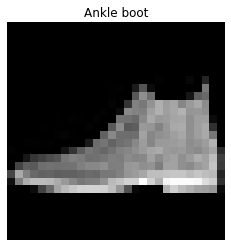

In [ ]:
# Plot test image
import matplotlib.pyplot as plt
plt.imshow(test_image, cmap="gray")
plt.axis(False)
plt.title(class_names[test_label]);

看起来不错！

现在让我们尝试通过将其传递给我们的 `model_6` 来对其进行预测。

In [ ]:
# Pass the test image through model_6 to make a prediction
model_6(test_image)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

糟糕！

我们又遇到了另一个设备错误。

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)
```

这是因为我们的 `model_6` 在GPU上（`"cuda"`），然而，我们的 `test_image` 在CPU上（在PyTorch中，默认情况下所有张量都在CPU上）。

让我们将 `test_image` 发送到目标 `device`，然后再尝试进行预测。

In [ ]:
# Send test_image to target device
model_6(test_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x10)

哦，不！又是另一个错误...

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x10)
```

这次是形状错误。

我们以前见过这些。

我们的 `test_image` 形状出了什么问题？

也许是因为我们的模型是在带有批次维度的图像上训练的？

而我们当前的 `test_image` 没有批次维度？

这里有另一个有用的经验法则要记住：**训练过的模型喜欢以与它们训练时相同的格式和形状的数据进行预测**。

这意味着如果我们的模型是在带有批次维度的图像上训练的，即使批次维度只有1（单个样本），它也倾向于喜欢对带有批次维度的图像进行预测。

如果我们的模型是在格式为 `torch.float32`（或其他格式）的数据上进行训练的，它也喜欢对具有相同格式的数据进行预测（我们稍后会看到这一点）。

我们可以使用 [`torch.unsqueeze()`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) 方法向我们的 `test_image` 添加一个单独的批次维度。

In [ ]:
# Changing the input size to be the same as what the model was trained on
original_input_shape = test_image.shape
updated_input_shape = test_image.unsqueeze(dim=0).shape # adding a batch dimension on the "0th" dimension

# Print out shapes of original tensor and updated tensor
print(f"Original input data shape: {original_input_shape} -> [height, width]")
print(f"Updated input data shape (with added batch dimension): {updated_input_shape} -> [batch, height, width]")

Original input data shape: torch.Size([28, 28]) -> [height, width]
Updated input data shape (with added batch dimension): torch.Size([1, 28, 28]) -> [batch, height, width]


太好了！

我们找到了一种方法为我们的 `test_image` 添加一个批次维度。

让我们再次尝试对其进行预测。

In [ ]:
# Make prediction on test image with additional batch size dimension and with it on the target device
model_6(test_image.unsqueeze(dim=0).to(device))

RuntimeError: expected scalar type Float but found Byte

什么？

又是另一个错误！

这次是一个数据类型错误：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115
    116     def extra_repr(self) -> str:

RuntimeError: expected scalar type Float but found Byte
```

我们碰到了 PyTorch 中第三个最常见的错误，数据类型错误。

让我们在下一节中找出如何修复它们。

## 3. PyTorch中的设备错误

回想一下经验法则：**训练过的模型喜欢对与它们训练时相同形状和格式的数据进行预测**。

看起来我们的模型期望的是 `Float` 数据类型，但我们的 `test_image` 是 `Byte` 数据类型。

我们可以通过前一个错误中的最后一行来确定：

```
RuntimeError: expected scalar type Float but found Byte
```

为什么会这样呢？

因为我们的 `model_6` 是在 `Float` 格式的数据样本上进行训练的，具体来说是 `torch.float32`。

我们如何知道这一点呢？

嗯，`torch.float32` 是 PyTorch 中许多张量的默认值，除非另有明确设置。

但让我们进行一次检查以确保。

### 3.1 检查训练模型的数据类型

我们可以通过查看来自 `train_dataloader` 的样本的 `dtype` 属性来检查我们的模型训练所使用的数据的数据类型。

In [ ]:
# Get a single sample from the train_dataloader and print the dtype
train_image_batch, train_label_batch = next(iter(train_dataloader))
train_image_single, train_label_single = train_image_batch[0], train_label_batch[0]

# Print the datatype of the train_image_single
print(f"Datatype of training data: {train_image_single.dtype}")

Datatype of training data: torch.float32


搞定！我们确认了我们的训练数据样本是 `torch.float32` 类型。

所以，我们的 `model_6` 想要对这种数据类型进行预测是合理的。

但是我们的训练数据是如何变成这种数据类型的呢？

这是发生在第 1.3 节中的，当我们下载了 Fashion MNIST 数据集并使用了 [`torchvision.transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html) 的 `transform` 参数时发生的。

这个 `transform` 将传递给它的任何数据转换为一个 `torch.Tensor`，其默认数据类型为 `torch.float32`。

因此，另一个经验法则是：**在进行预测时，对训练数据执行的任何转换都应该对测试数据执行相同的转换**。

### 3.2 改变张量数据类型

在我们的情况下，我们可以创建一个独立的转换来转换我们的测试数据，但我们也可以使用 `tensor.type(some_type_here)` 来更改目标张量的数据类型，例如，`tensor_1.type(torch.float32)`。

让我们试一试。

In [ ]:
# Print out the original datatype of test_image
print(f"Original datatype: {test_image.unsqueeze(dim=0).dtype}")

# Change the datatype of test_image and see the change
print(f"Changing the datatype: {test_image.unsqueeze(dim=0).type(torch.float32).dtype}")

Original datatype: torch.uint8
Changing the datatype: torch.float32


### 3.3 对测试图像进行预测，并确保其格式正确

好的，看起来我们已经准备好了所有的拼图，形状、设备和数据类型，让我们尝试进行预测吧！

> **注意：**记住，模型喜欢对与其训练时相同（或类似）格式的数据进行预测（形状、设备和数据类型）。

In [ ]:
# Make a prediction with model_6 on the transformed test_image
pred_on_gpu = model_6(test_image.unsqueeze(dim=0) # add a batch dimension
                      .type(torch.float32) # convert the datatype to torch.float32
                      .to(device)) # send the tensor to the target device
pred_on_gpu

tensor([[ -963.8352, -1658.8182,  -735.9952, -1285.2964,  -550.3845,   949.4190,
          -538.1960,  1123.0616,   552.7371,  1413.8110]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

哇哦！

经过一番努力，我们的 `model_6` 成功对 `test_image` 进行了预测。

由于 `test_image` 默认位于 CPU 上，我们也可以使用 [`.cpu()` 方法](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) 将模型放回到 CPU 上，然后在 CPU 设备上进行相同的预测，而不是在 GPU 设备上。

In [ ]:
# Put model back on CPU
model_6.cpu()

# Make a prediction on the CPU device (no need to put test_image on the CPU as it's already there)
pred_on_cpu = model_6(test_image.unsqueeze(dim=0) # add a batch dimension
                      .type(torch.float32)) # convert the datatype to torch.float32
pred_on_cpu

tensor([[ -963.8351, -1658.8182,  -735.9953, -1285.2964,  -550.3845,   949.4189,
          -538.1960,  1123.0615,   552.7371,  1413.8110]],
       grad_fn=<AddmmBackward0>)

再次，预测成功了！

那么它是正确的吗？

我们可以通过将模型的原始输出从 `原始对数 -> 预测概率 -> 预测标签` 进行转换来检查

In [ ]:
# Convert raw logits to prediction probabilities
pred_probs = torch.softmax(pred_on_cpu, dim=1)

# Convert prediction probabilities to prediction label
pred_label = torch.argmax(pred_probs, dim=1)

# Check if it's correct
print(f"Test label: {test_label}")
print(f"Pred label: {pred_label}")
print(f"Is the prediction correct? {pred_label.item() == test_label}")

Test label: 9
Pred label: tensor([9])
Is the prediction correct? True


在对测试或自定义样本进行预测时，可能涉及到很多步骤。

因此，防止重复所有这些步骤的一种方法是将它们转换为一个函数。


## 将所有内容整合起来

我们已经亲自体验了在使用PyTorch构建神经网络时会遇到的三个主要错误：

1. **形状错误** - 数据与正在构建的神经网络之间存在不匹配，或者神经网络中连接的层之间存在不匹配。
2. **设备错误** - 您的模型和数据位于不同的设备上，PyTorch希望*所有*张量和对象都位于*相同*的设备上。
3. **数据类型错误** - 您试图在一个数据类型上进行计算，而模型期望另一种数据类型。

我们已经了解了它们是如何发生以及为什么会发生，然后学习了如何修复它们：

* 您的模型希望对与其训练相同类型的数据进行预测（形状、设备和数据类型）。
* 您的模型和数据应在训练和测试中处于同一设备上。
* 您可以通过创建可重用函数来解决许多这些问题，该函数定义了`device`和数据类型，例如[04. PyTorch 模块化部分 4：创建训练和测试函数](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them)中所述。

了解这些错误不会阻止您将来出现这些错误，但它将为您提供修复它们的思路。

有关这些错误的更深入示例，包括如何在实践中制造并修复它们，请查看[从零开始：深度学习PyTorch课程](https://dbourke.link/ZTMPyTorch)。